In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Fetching VIX data using yfinance
start_date = '2020-01-01'
end_date = '2023-03-11'
ticker = '^VIX' # VIX index
vix_data = yf.download(ticker, start=start_date, end=end_date)

# Printing the head of the data
print(vix_data.head())

[*********************100%***********************]  1 of 1 completed
             Open       High    Low  Close  Adj Close  Volume
Date                                                         
2020-01-02  13.46  13.720000  12.42  12.47      12.47       0
2020-01-03  15.01  16.200001  13.13  14.02      14.02       0
2020-01-06  15.45  16.389999  13.54  13.85      13.85       0
2020-01-07  13.84  14.460000  13.39  13.79      13.79       0
2020-01-08  15.16  15.240000  12.83  13.45      13.45       0


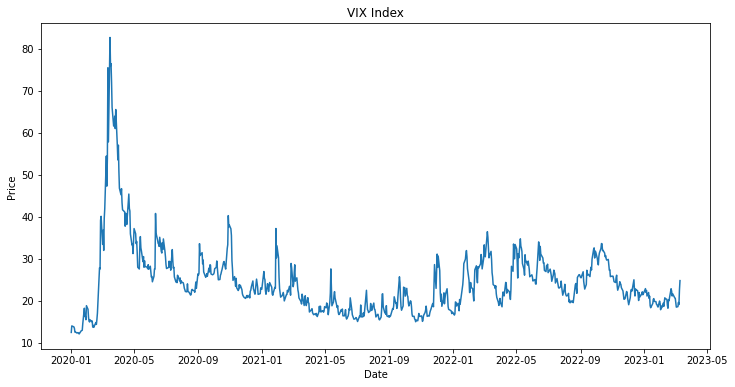

In [3]:
# Plotting the VIX index
plt.figure(figsize=(12, 6))
plt.plot(vix_data['Close'])
plt.title('VIX Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
# Calculating VIX performance metrics
daily_returns = vix_data['Close'].pct_change()
cumulative_returns = (1 + daily_returns).cumprod() - 1
annualized_return = (1 + cumulative_returns[-1]) ** (252 / len(cumulative_returns)) - 1
sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std()

# Printing the performance metrics
print('Annualized Return:', annualized_return)
print('Sharpe Ratio:', sharpe_ratio)

Annualized Return: 0.2408033387380224
Sharpe Ratio: 0.7843814095521677


In [5]:
# Calculating financial ratios
vix_data['SMA20'] = vix_data['Close'].rolling(window=20).mean()
vix_data['SMA50'] = vix_data['Close'].rolling(window=50).mean()
vix_data['returns'] = vix_data['Close'].pct_change()
vix_data['daily_high_low_diff'] = vix_data['High'] - vix_data['Low']
vix_data['daily_open_close_diff'] = vix_data['Open'] - vix_data['Close'].shift(1)
vix_data['daily_returns'] = vix_data['Close'].pct_change()
vix_data['weekly_returns'] = vix_data['Close'].pct_change(periods=5)
vix_data.dropna(inplace=True)

# Printing the head of the data
print(vix_data.head())

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2020-03-13  71.309998  77.570000  55.169998  57.830002  57.830002       0   
2020-03-16  57.830002  83.559998  57.830002  82.690002  82.690002       0   
2020-03-17  82.690002  84.830002  70.370003  75.910004  75.910004       0   
2020-03-18  69.370003  85.470001  69.370003  76.449997  76.449997       0   
2020-03-19  80.620003  84.260002  68.570000  72.000000  72.000000       0   

              SMA20    SMA50   returns  daily_high_low_diff  \
Date                                                          
2020-03-13  35.3995  22.7692 -0.233735            22.400002   
2020-03-16  38.8500  24.1736  0.429881            25.729996   
2020-03-17  41.9040  25.4114 -0.081993            14.459999   
2020-03-18  45.0075  26.6634  0.007114            16.099998   
2020-03-19  47.8295  27.8276 -0.058208            15.690002   

            daily_

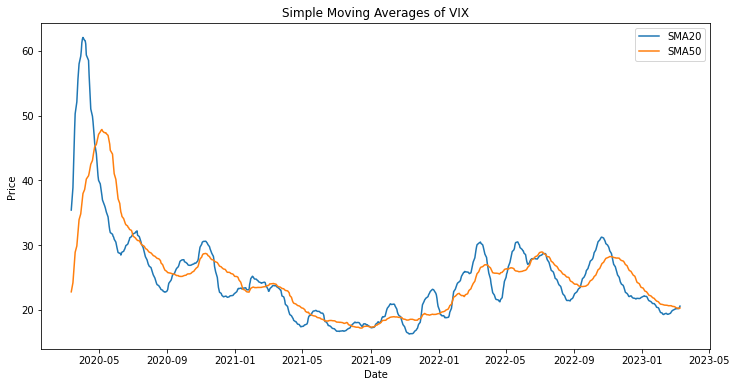

/Users/chrislernunes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


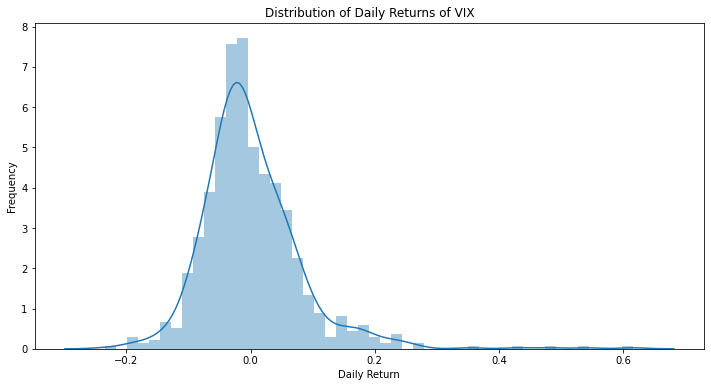

/Users/chrislernunes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


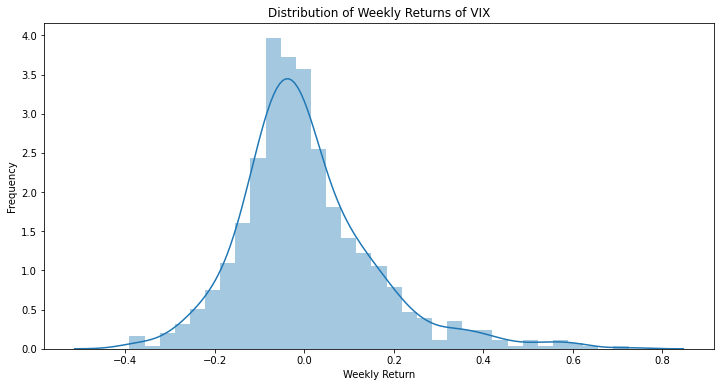

In [6]:
# Plotting financial ratios
plt.figure(figsize=(12, 6))
plt.plot(vix_data['SMA20'], label='SMA20')
plt.plot(vix_data['SMA50'], label='SMA50')
plt.title('Simple Moving Averages of VIX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(vix_data['daily_returns'])
plt.title('Distribution of Daily Returns of VIX')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(vix_data['weekly_returns'])
plt.title('Distribution of Weekly Returns of VIX')
plt.xlabel('Weekly Return')
plt.ylabel('Frequency')
plt.show()

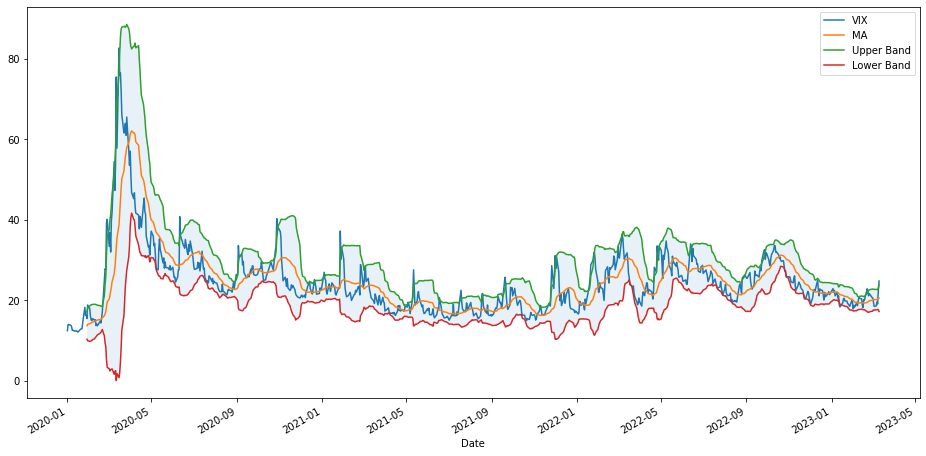

In [18]:
#Calculate moving average and standard deviation
vix_data['MA'] = vix_data['Close'].rolling(window=20).mean()
vix_data['STD'] = vix_data['Close'].rolling(window=20).std()

# Calculate upper and lower bands
vix_data['UpperBand'] = vix_data['MA'] + (vix_data['STD'] * 2)
vix_data['LowerBand'] = vix_data['MA'] - (vix_data['STD'] * 2)

# Calculate the percentage of the close price that is outside the Bollinger Bands
vix_data['PctOutsideBB'] = (vix_data['Close'] - vix_data['LowerBand']) / (vix_data['UpperBand'] - vix_data['LowerBand'])

# Plot the data
fig, ax = plt.subplots(figsize=(16, 8))
vix_data['Close'].plot(ax=ax)
vix_data['MA'].plot(ax=ax)
vix_data['UpperBand'].plot(ax=ax)
vix_data['LowerBand'].plot(ax=ax)
ax.fill_between(vix_data.index, vix_data['UpperBand'], vix_data['LowerBand'], alpha=0.1)
plt.legend(['VIX', 'MA', 'Upper Band', 'Lower Band'])
plt.show()

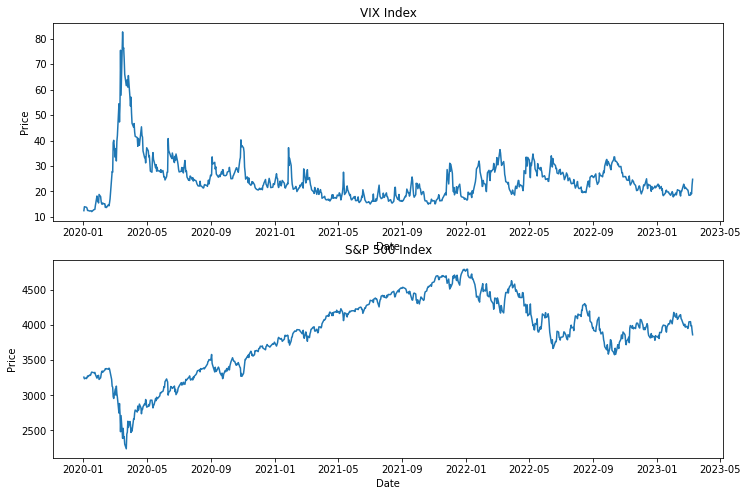

In [8]:
# Plotting the VIX and S&P 500 indexes
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(data['VIX'])
axs[0].set_title('VIX Index')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[1].plot(data['S&P 500'])
axs[1].set_title('S&P 500 Index')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
plt.show()

In [9]:
# Splitting the data into training and testing datasets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Creating the training and testing input and output variables
train_x, train_y = train_data['S&P 500'].values.reshape(-1, 1), train_data['VIX'].values.reshape(-1, 1)
test_x, test_y = test_data['S&P 500'].values.reshape(-1, 1), test_data['VIX'].values.reshape(-1, 1)

In [10]:
# Building and training the linear regression model
model = LinearRegression()
model.fit(train_x, train_y)

# Making predictions on the testing dataset
predictions = model.predict(test_x)

# Evaluating the model performance
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 8.192453213953259
R-squared: 0.4563513337626627


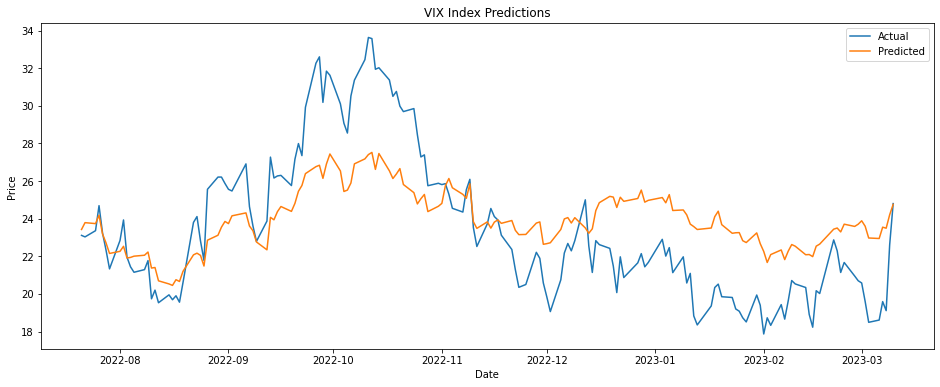

In [22]:
# Plotting the actual and predicted VIX values
plt.figure(figsize=(16, 6))
plt.plot(test_data.index, test_y, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('VIX Index Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()